***Data Mining & Analytics***

CALI BOND 

## About the dataset
This assignment uses a dataset obtained from the JSE Data Archive that contains biological and self-reported activity traits of a sample of college students at a single university uploaded in 2013. The study associated with these data focused on exploring if a correspondence exists between eye color and other traits. You will be using gender as the target/label in this lab.

FEATURE DESCRIPTIONS:
- Color (Blue, Brown, Green, Hazel, Other)
- Age (in years)
- YearinSchool (First, Second, Third, Fourth, Other)
- Height (in inches)
- Miles (distance from home town of student to Ames, IA)
- Brothers (number of brothers)
- Sisters (number of sisters)
- CompTime (number of hours spent on computer per week)
- Exercise (whether the student exercises Yes or No)
- ExerTime (number of hours spent exercising per week)
- MusicCDs (number of music CDs student owns)
- PlayGames (number of hours spent playing games per week)
- WatchTV (number of hours spent watching TV per week

Background Information on the dataset: http://jse.amstat.org/v21n2/froelich/eyecolorgender.txt


In [1]:
from collections import Counter, defaultdict
from itertools import combinations
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt


!wget -nc http://quadro.ist.berkeley.edu:1331/eye_color.csv
!ls
df = pd.read_csv('eye_color.csv')
# remove NA's and reset the index
df = df.dropna(axis=0, how='any', subset=None, inplace=False)
df = df.reset_index(drop=True)

df.head()

File ‘eye_color.csv’ already there; not retrieving.

 BOND_CALI_Lab3.ipynb   Untitled1.ipynb      Untitled.ipynb
 eye_color.csv	       'Untitled Folder'     WHERE-ARE-MY-FILES.txt
'IND ENG 142A'	       'Untitled Folder 1'


,gender,age,year,eyecolor,height,miles,brothers,sisters,computertime,exercise,exercisehours,musiccds,playgames,watchtv
0,female,18,first,hazel,68.0,195.0,0,1,20.0,Yes,3.0,75.0,6.0,18.0
1,male,20,third,brown,70.0,120.0,3,0,24.0,No,0.0,50.0,0.0,3.0
2,female,18,first,green,67.0,200.0,0,1,35.0,Yes,3.0,53.0,8.0,1.0
3,male,23,fourth,hazel,74.0,140.0,1,1,5.0,Yes,25.0,50.0,0.0,7.0
4,female,19,second,blue,62.0,60.0,0,1,5.0,Yes,4.0,30.0,2.0,5.0


***Finding Best Split for Decision Tree***

In [6]:
males_and_females = df['gender'].value_counts()
males_and_females

gender
female    1078
male       910
Name: count, dtype: int64

In [4]:
p = males_and_females / len(df)
gini_index = 1 - sum(p**2)
print(gini_index)

0.4964292799047807


In [9]:
df = df.sort_values(by=['height'])
unique_heights = df['height'].unique()
unique_heights

gini = lambda x: 1 - sum((y/len(x)) ** 2 for y in x['gender'].value_counts())

best_gini = None
min_gini = float('inf')

for i in range(len(unique_heights) - 1):
  split = (unique_heights[i] + unique_heights[i + 1])/2
  left = df[df['height'] <= split]
  right = df[df['height'] > split]
  new_gini = (len(left)) / len(df) * gini(left) + (len(right)) / len(df) * gini(right)
  if new_gini < min_gini:
    min_gini = new_gini
    best_split = split
print(best_split)

68.5


In [12]:
min_gini
print(gini_of_best_split_point)

0.2655288120702919


In [13]:
overall_gini = gini(df)
gini_difference = overall_gini - min_gini 

In [17]:
plus_two = best_split + 2
minus_two = best_split - 2
female_rows_within = len(df[(df['height'] <= plus_two) & (df['height'] >= minus_two) & (df['gender'] == 'female')])
male_rows_within = len(df[(df['height'] <= plus_two) & (df['height'] >= minus_two) & (df['gender'] == 'male')]) 
female_rows_below = len(df[(df['height'] < best_split) & (df['gender'] == 'female')])
male_rows_below = len(df[(df['height'] < best_split) & (df['gender'] == 'male')]) 
print(female_rows_within, male_rows_within)
print(female_rows_below, male_rows_below)

377 306
905 142


***Finding Best Split For Categorical Feature***

In [18]:
unique_eyecolors = df['eyecolor'].unique()

def power_set(eyecolors):
  ps = []
  for i in range(len(eyecolors)):
    ps += itertools.combinations(eyecolors, i)
  return ps

power_set = power_set(unique_eyecolors)

num_splits = len(power_set)/2

power_set
num_splits

15.5

In [19]:
def new_gini(u, v):
  total = len(u) + len(v)
  u_gini = gini(u)
  v_gini = gini(v)
  new = (len(u)) / total * u_gini + (len(v) / total) * v_gini
  return new

unique_eyecolors = df['eyecolor'].unique()
possible_splits = []
for i in range(1, len(unique_eyecolors)):
  possible_splits += itertools.combinations(unique_eyecolors, i)

best_split = None
min_gini = float('inf')

for p in possible_splits:
  L_group = df[df['eyecolor'].isin(p)]
  R_group = df[~df['eyecolor'].isin(p)]
  gini_idx = new_gini(L_group, R_group)
  if gini_idx < min_gini:
    min_gini = gini_idx
    best_split = p

print(best_split)
print(min_gini)

('green',)
0.4930915729509777


In [23]:
colour_group_1 = ['green'] 
colour_group_2 = ['blue', 'brown', 'hazel', 'other'] 
print(colour_group_1, colour_group_2)
print(gini_of_best_split_group)

['green'] ['blue', 'brown', 'hazel', 'other']
0.4930915729509777


In [24]:
gini_difference_2 = overall_gini - min_gini
print(gini_difference_2)

0.003337706953802977


In [25]:
colour_group_1 = ['green'] 
colour_group_2 = ['blue', 'brown', 'hazel', 'other'] 
par_1 = df[df['eyecolor'].isin(colour_group_1)]
par_2 = df[df['eyecolor'].isin(colour_group_2)]
female_par_1 = par_1[par_1['gender'] == 'female'].shape[0]
female_par_2 = par_2[par_2['gender'] == 'female'].shape[0]
male_par_1 = par_1[par_1['gender'] == 'male'].shape[0]
male_par_2 = par_2[par_2['gender'] == 'male'].shape[0]

In [30]:
#Parition Male and Female Details 
partition1_male = male_par_1 
partition1_female = female_par_1 
partition2_male = male_par_2 
partition2_female = male_par_2
print(partition1_male, partition1_female, partition2_male, partition2_female)

107 190 803 803


In [27]:
#Training the Decision Tree
from sklearn.metrics import accuracy_score

X = df.drop(columns = ['gender']).to_dict(orient = 'records')
vec = DictVectorizer(sparse=False)
df_data = vec.fit_transform(X)
le = preprocessing.LabelEncoder()
Y = le.fit_transform(df['gender'])
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(df_data, Y)
Y_prediction = clf.predict(df_data)
accuracy = accuracy_score(Y, Y_prediction)

accuracy

0.8646881287726358

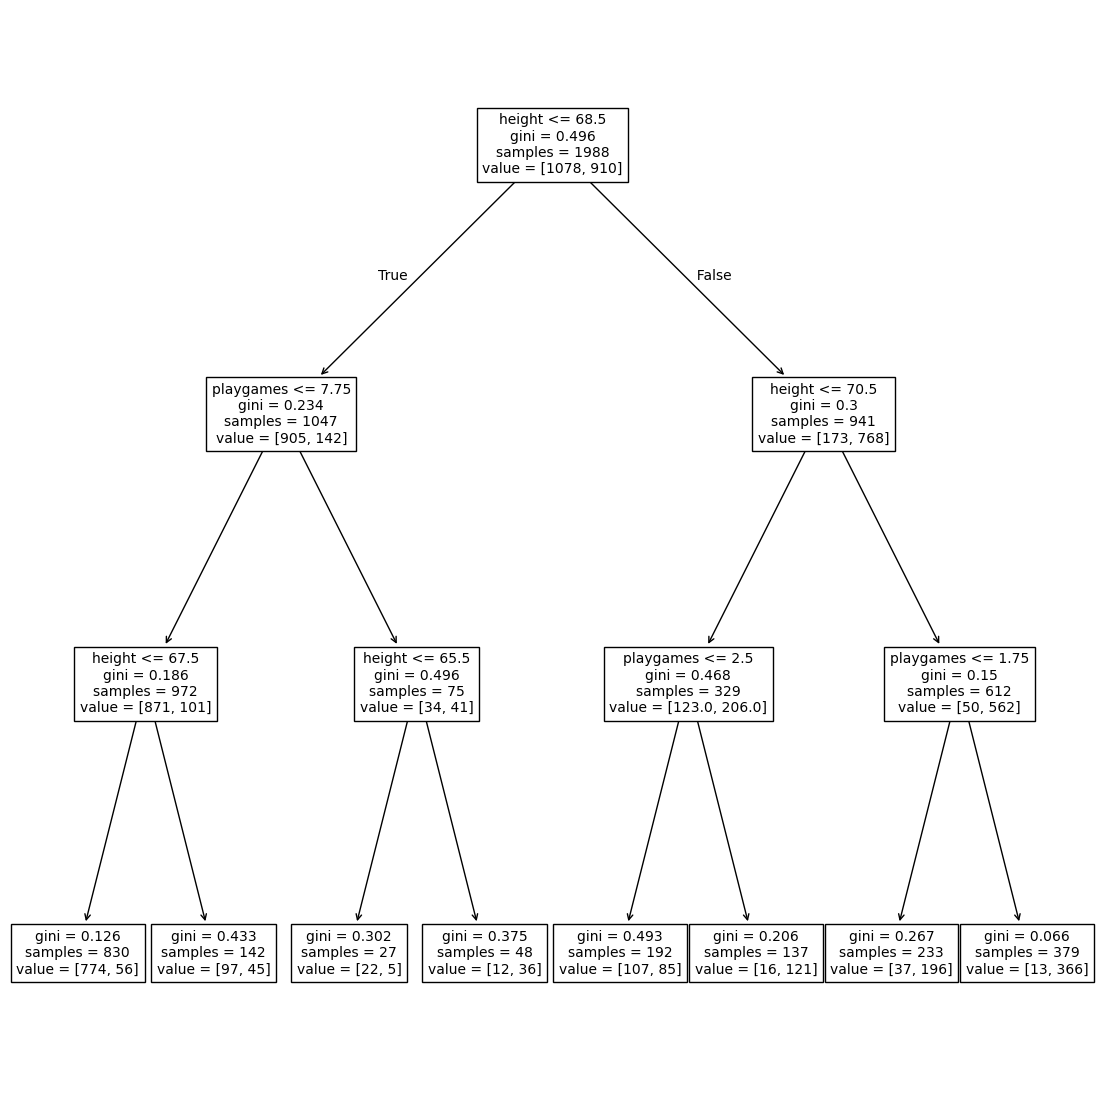

In [28]:
#Using `tree.plot_tree`
X = df.drop(columns = ['gender']).to_dict(orient = 'records')
vec = DictVectorizer(sparse=False)
df_data = vec.fit_transform(X)
le = preprocessing.LabelEncoder()
Y = le.fit_transform(df['gender'])
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(df_data, Y)
fig, ax = plt.subplots(figsize=(14, 14))
tree.plot_tree(clf, fontsize=10, feature_names= vec.get_feature_names_out());

***Decision Tree Documentation***


The top/first node splits the entire dataset based on the height feature being less than or equal to 68.5 inches. The Gini index is .496 indicating that there is a pretty even split between the data where height is greater than or less than/equal to 68.5. There are 1988 samples in this node demonstrating the entirety of the dataset. Then it shows that there is 1078 females and 910 in the node. Starting with the left child node which illustrates samples with height <= 68.5, is split based on the feature "playgames" being less than or equal to 7.75 (hours of game playing per week). The Gini index here is .234 indicating greater purity. There are 905 females and 142 male. The right child uses the the height feature for splitting based on if it is less than or equal to 70.5. The Gini index is .3 also showing better purity but less than the left child. And there are 768 females and 173 males.

The left child of the left child node(most left grandchild of parent node) uses height to split samples less than or equal to 67.5. The Gini index is .186 indicating even better purity. And there are 871 females and 101 males. The right child of the left child node splits based on the feature height as well, with 34 females and 41 males. The Gini index for this node is quite high at .496 indicating an even split.

The left most grand-grandchild of the parent node(bottom left) contains samples where height <= 67.5 is true. The Gini index is .126 which is a good level of purity but not entirely pure which is the goal. There are 774 females and 56 males. This node's sibling(to the right) has a gini index of .433 which is bad. This means that there are 97 females and 45 males. Moving from left to right, the left child of the right grandchild node of the root node has a gini index of .302 with 22 females and 5 males. This nodes sibling has a gini .375 with 12 females and 36 males. These Gini indices of around .3 are not good - as they are between a clean split and an even split and makes the classification blurry.

Moving onto the children of right child node of the root node, we have playgames <= 2.5 for our split on the left child node. The Gini index is .468 which indicates a relatively even split. There are 123 females and 206 males. I will now interpret the children of these nodes. The left child, has a gini of .493 with 107 females and 85 males. This even spit makes decision harder. And its right sibling has a gini of .206 with 16 females and 121 males. Now for the rightmost grandchild of the root node the feature is playing games split on <= 1.75 hours. The gini is .15 which is pretty good and there are 50 females and 562 males. For the right most grand-grandchild of the root node there is a gini index of .066 which is nearly 0! There are 13 females and 366 males. This is the best split in our entire decision tree. This node's left sibling has gini of .267 with 37 females and 196 males. Based on the gini indices of the entire tree, I think the decision tree would need a couple more depth levels to be properly useful and have better purity. But it is clear that the more video games played hourly per week, the more likely the sample is male.